In [ ]:
"""
Purpose: To put all of the rules together
to autoatically proofread a cell


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

import numpy as np

import proofreading_utils as pru

import preprocessing_vp2 as pre

# -- For the axon classification --

import neuron_searching as ns

import skeleton_utils as sk

import numpy_utils as nu

import networkx_utils as xu

import system_utils as su

import classification_utils as clu
import proofreading_utils as pru

INFO - 2021-02-02 19:01:28,860 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-02 19:01:28,862 - settings - Setting database.user to celiib
INFO - 2021-02-02 19:01:28,862 - settings - Setting database.password to newceliipass
INFO - 2021-02-02 19:01:28,874 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-02 19:01:28,875 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-02 19:01:28,889 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-02 19:01:29,173 - settings - Setting enable_python_native_blobs to True


In [4]:
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-02 19:01:53,711 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-02 19:01:53,989 - settings - Setting enable_python_native_blobs to True


# Importing the Neuron

In [11]:
curr_table = minnie.Decomposition & "process_version = 4" & "n_limbs>5" 
curr_table

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135012398582,0,0.25,30.00,4,0,1,=BLOB=,1376990,2794781,0,3,1,3,2,7,332,193,13857599.090995071,7698499.767603829,24782.936,182.056,175.907,512.504,498.037,5073,0.00036608073062934334,15.28012048192771,9021770.899,184,0.0005623064536655776,27.571,1130755898564.6187,149139625.2549947,81598.25458505328,125336.35704382107,6145412492.199015,18888.6673
864691135012571126,0,0.25,30.00,4,0,1,=BLOB=,1405952,2834699,0,5,5,0,1,9,438,190,15005335.104019193,5950109.147626077,22518.656,140.086,140.086,469.827,405.969,5271,0.000351275060734109,12.034246575342467,9075502.16,228,0.0005807943083559357,23.118,1169557046930.9404,149701410.7930819,77942.74761765724,128869.67864827663,5129636170.749739,18283.2209
864691135065018692,0,0.25,30.00,4,0,1,=BLOB=,927599,1896021,0,2,2,1,2,19,275,62,10134692.441118384,2065744.7931319945,17371.879,110.248,110.248,544.807,544.758,1859,0.0001834293453699376,6.76,5876271.812,132,0.00031635704737206256,14.083,333744826425.14685,116071713.89832559,32930.92793532444,56795.33505301828,2528369897.1602035,13467.9901
864691135065032772,0,0.25,30.00,4,0,1,=BLOB=,1284918,2610256,0,1,0,1,3,19,339,49,12070580.98087547,2067456.6676802342,24476.944,293.07,258.608,496.883,455.767,4680,0.00038771953126489554,13.805309734513274,9141427.307,231,0.0005119550637805012,20.26,984274848135.3904,134477821.95931625,81543.28691343585,107671.90013989249,4260930078.5081835,10872.3472
864691135210078912,0,0.25,30.00,4,0,1,=BLOB=,2254579,4581171,0,1,1,1,3,19,680,410,25709086.238637865,14910186.433055326,22806.349,91.868,91.868,488.977,396.491,7956,0.00030946257389899087,11.7,14370940.599,305,0.0005536172072518077,26.085,1530423053724.611,123769896.05576578,59528.48885871943,106494.2856858726,5017780504.015119,21160.2523
864691135341171909,0,0.25,30.00,4,0,1,=BLOB=,822316,1638121,0,2,2,0,1,11,199,68,9450347.657808917,3250054.207938929,29478.786,237.546,234.

In [10]:
segment_id = 864691135403709422

In [12]:
neuron_obj_original = (curr_table & dict(segment_id=segment_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [13]:
nviz.visualize_neuron_lite(neuron_obj_original)


 Working on visualization type: mesh


# Splitting the Neuron

multi_soma_limbs = [0]
multi_touch_limbs = []


 -------- Working on limb 0------------
Starting combinations to process = [[ 0 10]]


---- working on disconnecting 0 and 10
---- This disconnects S1_0 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [0, 2, 8, 7, 11, 10]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [ 1  2  5  7  8  9 11 12 13]
Short segments to combine = [ 8 13]


-------- Removing Segments -------------
curr_short_seg_revised = 8
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[842231.25 797537.   902547.  ]
 [842956.   799143.   902193.  ]]
new_stitch_point = [842593.625 798340.    902370.   ]
Angles for [2 5 7 9] are [54.47, 15.39, 32.03, 33.51]
Branch that will absorb mesh of 8 is 5 
curr_short_seg_revised = 13
np

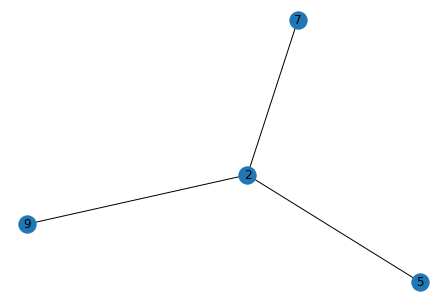

match_branches = [[2, 9], [5, 7]]
edges_to_delete (resolve crossover) = [[2, 5], [2, 7], [5, 9], [7, 9]]
edges_to_create (resolve crossover) = [[2, 9], [5, 7]]
curr_limb.deleted_edges 5 =[]
nx.number_connected_components(G) before = 1
G.edges() = [(0, 2), (7, 11), (11, 10)]
G.nodes() = [0, 2, 7, 11, 10]
nx.number_connected_components(G) after = 2
Using the resolve crossover delete edges because will help seperate the path
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 5], [2, 7], [5, 9], [7, 9]]
edges_to_create = [[2, 9], [5, 7]]
Number of connected components = 4
Comp 0 = {3, 4, 5, 6, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62}
Comp 1 = {0, 9, 2, 1}
Comp 2 = {8}
Comp 3 = {13}
curr_limb_copy.deleted_edges = [[2, 5], [2, 7], [5, 9], [7, 9]]
curr_limb_copy.created_edges = [[2, 9], [5, 7]]
After get best cut: cut_

In [25]:
split_results = pru.multi_soma_split_suggestions(neuron_obj_original,
                                                )

In [27]:
nviz.plot_split_suggestions_per_limb(neuron_obj_original,
                                    split_results)



-------- Suggestions for Limb 0------

 Working on visualization type: mesh

 Working on visualization type: skeleton


In [29]:
(neuron_list,
neuron_list_errored_limbs_area,
 neuron_list_errored_limbs_skeletal_length,
neuron_list_n_multi_soma_errors,
neuron_list_n_same_soma_errors) = pru.split_neuron(neuron_obj_original,
                limb_results=split_results,
                               verbose=False,
                                return_error_info=True
                                    )

print(f" # of neurons = {len(neuron_list)}")
print(f"neuron_list_errored_limbs_area = {neuron_list_errored_limbs_area}")
print(f"neuron_list_errored_limbs_skeletal_length = {neuron_list_errored_limbs_skeletal_length}")
print(f"neuron_list_n_multi_soma_errors = {neuron_list_n_multi_soma_errors}")
print(f"neuron_list_n_same_soma_errors = {neuron_list_n_same_soma_errors}")

using precomputed split suggestions
Concept graph size was 1 or less so returning original
Concept graph size was 1 or less so returning original


------ Working on Soma 0 -------
limb_neighbors = [0, 3, 4, 5, 9, 10]
limb_neighbors BEFORE error limbs removed = [0, 3, 4, 5, 9, 10]
limb_neighbors AFTER error limbs removed = [ 0  3  4  5  9 10]
curr_n_multi_soma_limbs_cancelled = 0
curr_n_same_soma_limbs_cancelled = 0
n_errored_lims = 0
curr_error_limbs_cancelled_area = []
local_floating_meshes = []
Already have preprocessed data
--- 1) Finished unpacking preprocessed materials: 8.487701416015625e-05
total_edges = [['S0', 'L0'], ['S0', 'L1'], ['S0', 'L2'], ['S0', 'L3'], ['S0', 'L4'], ['S0', 'L5']]
--- 2) Finished creating neuron connectivity graph: 0.0001232624053955078
Having to generate soma_meshes_face_idx because none in preprocessed data
--- 3a) Finshed generating soma_meshes_face_idx: 0.3206961154937744
Using precomputed volume ratio
--- 3b) Finished soma creation: 0.09976887702941

In [30]:
neuron_obj_1 = neuron_list[0]
nviz.visualize_neuron_lite(neuron_obj_1)


 Working on visualization type: mesh


In [31]:
neuron_obj_2 = neuron_list[1]
nviz.visualize_neuron_lite(neuron_obj_2)


 Working on visualization type: mesh


# Iterating through the Neurons

In [45]:
import copy
import time
neuron_obj = copy.deepcopy(neuron_obj_1)

debug_time = True
verbose = True

# Step 1: Axon Classification

In [37]:
filter_time = time.time()

axon_limb_branch_dict,axon_angles = clu.axon_classification(neuron_obj,
                                                        return_error_labels=False,
                                                        verbose=False,
                                                        plot_axons=False,
                                                        label_axon_errors=True,
                                                        return_axon_angles=True)

if debug_time:
    print(f"Axon Classification = {time.time() - filter_time}")
    filter_time = time.time()


Phase 2: Working on Limb L1

Phase 2: Working on Limb L2

Phase 2: Working on Limb L3

Phase 2: Working on Limb L4

Phase 2: Working on Limb L5
candidate_nodes = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
non_axon_branches_on_subgraph = [ 1  2  3  4  5  7  8 10]
endnodes_to_test BEFORE FILTER = [3352 3453 3465 3653 3669]
candidate_nodes = [0 1 2 3 4 5 6 7 8 9]
non_axon_branches_on_subgraph = [0 1 3 6 7 8 9]
endnodes_to_test BEFORE FILTER = [4339 4368]
candidate_nodes = [0 1 2 3 4]
non_axon_branches_on_subgraph = [0 1 3 4]
endnodes_to_test BEFORE FILTER = [1855 1948]
candidate_nodes = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
non_axon_branches_on_subgraph = []
endnodes_to_test BEFORE FILTER = [1825]
Axon Classification = 20.067079782485962


In [41]:
print(f"axon_angles = {axon_angles}")

axon_angles = {5: {0: 159.45430831044462}}


In [38]:
import neuron_searching as ns
axon_limb_branch_dict = ns.query_neuron_by_labels(neuron_obj,
                                                 matching_labels=["axon"])
nviz.plot_limb_branch_dict(neuron_obj,
                          axon_limb_branch_dict)


 Working on visualization type: mesh


In [39]:
axon_like_limb_branch_dict = ns.query_neuron_by_labels(neuron_obj,
                                                 matching_labels=["axon-like"])
nviz.plot_limb_branch_dict(neuron_obj,
                          axon_like_limb_branch_dict)


 Working on visualization type: mesh


# Classify the Neuron Cell Type

In [40]:
clu.inhibitory_excitatory_classifier(neuron_obj,
                                     verbose=True,

axon_limb_branch_dict=axon_limb_branch_dict,
    axon_angles=axon_angles)

In [43]:
axon_limb_branch_dict

{'L5': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22])}

In [54]:
clu = reload(clu)

In [55]:
filter_time = time.time()

(inh_exc_class,
             spine_category,
             axon_angles,
             n_axons,
             n_apicals,
             neuron_spine_density,
             n_branches_processed,
             skeletal_length_processed,
             n_branches_in_search_radius,
             skeletal_length_in_search_radius
             ) = clu.inhibitory_excitatory_classifier(neuron_obj,
                                                return_spine_classification=True,
                                                return_axon_angles=True,
                                                 return_n_axons=True,
                                                 return_n_apicals=True,
                                                 return_spine_statistics=True,
                                                     axon_limb_branch_dict_precomputed=axon_limb_branch_dict,
                                                axon_angles_precomputed=axon_angles)

if debug_time:
    print(f"Inhibitory Excitatory Classification = {time.time() - filter_time}")
    filter_time = time.time()

spine_category = densely_spined
Using pre-computed axon classification for contains_excitatory_axon
axon_limb_branch_dict = {'L5': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])}
axon_angles = {5: {0: 159.45430831044462}}
Inhibitory Excitatory Classification = 13.416588544845581


In [56]:
if verbose:
    print("\n -- Cell Type Classification Results --")
    print(f"inh_exc_class={inh_exc_class}")
    print(f"spine_category={spine_category}")
    print(f"axon_angles={axon_angles}")
    print(f"n_axons={n_axons}")
    print(f"n_apicals={n_apicals}")
    print(f"neuron_spine_density={neuron_spine_density}")
    print(f"n_branches_processed={n_branches_processed}")
    print(f"skeletal_length_processed={skeletal_length_processed}")
    print(f"n_branches_in_search_radius={n_branches_in_search_radius}")
    print(f"skeletal_length_in_search_radius={skeletal_length_in_search_radius}")



 -- Cell Type Classification Results --
inh_exc_class=excitatory
spine_category=densely_spined
axon_angles={5: {0: 159.45430831044462}}
n_axons=1
n_apicals=1
neuron_spine_density=0.0005719720005404314
n_branches_processed=22
skeletal_length_processed=2556321.7933463836
n_branches_in_search_radius=67
skeletal_length_in_search_radius=3880744.5424105716


# Doing the Excitatory Filtering

# -- Step 1: Remove Floating Axon --

In [ ]:
input_neuron = neuron_obj

In [59]:
# checking that the axon labels are still there
axon_limb_branch_dict = ns.query_neuron_by_labels(neuron_obj,
                                                 matching_labels=["axon-error"])
axon_limb_branch_dict

{'L0': array([ 0,  3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]),
 'L1': array([ 0,  6,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'L3': array([2, 4, 5]),
 'L4': array([2])}

In [61]:
filter_time = time.time()
neuron_axon_merges,total_area_axon_merges,total_sk_distance_axon_merges = pru.filter_away_axon_on_dendrite_merges(
                input_neuron,
                use_pre_existing_axon_error_labels=True,
                plot_limb_branch_filter_with_disconnect_effect=True,
                return_error_info=True)

if debug_time:
    print(f"Axon on Dendrite Merge Filter = {time.time() - filter_time}")
    filter_time = time.time()



Branches Requested to Remove (without disconnect effect)

 Working on visualization type: mesh




----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [845912. 854215. 911219.]---------
Starting_edge inside branches_to_conept = [[845912.  854215.  911219. ]
 [849455.  843101.5 908225.5]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [3]
printing out current edge:
[[845912.  854215.  911219. ]
 [849455.  843101.5 908225.5]]
edge_endpoints_to_process was empty so exiting loop after 12 iterations
starting_node in concept map (that should match the starting edge) = 4
Total time for branches to concept conversion = 0.610905647277832

Done generating concept network 




----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [853953. 865995. 907230.]---------
Starting_edge inside branches_to_conept = [[853953. 865995. 907230.]
 [861596. 868391. 905521.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) =

In [62]:
if verbose:
    print("\n --Filter Away Axon on Dendrite Merges Results --")
    print(f"total_area_axon_merges={total_area_axon_merges}")
    print(f"total_sk_distance_axon_merges={total_sk_distance_axon_merges}")


 --Filter Away Axon on Dendrite Merges Results --
total_area_axon_merges=1685.7626820915536
total_sk_distance_axon_merges=2271.1698364736794


In [63]:
nviz.visualize_neuron_lite(neuron_axon_merges)


 Working on visualization type: mesh


# -- Step 2: Removing Hairball Mess --

In [78]:
function_name = "low_branch_cluster"
input_neuron = neuron_axon_merges

In [80]:
# checking that the axon labels are still there
axon_limb_branch_dict = ns.query_neuron_by_labels(input_neuron,
                                                 matching_labels=["axon-like"])
axon_limb_branch_dict

{'L5': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22])}

In [81]:
filter_time = time.time()
(neuron_axon_low_branch_cluster,
 total_area_current,
 total_sk_distance_current) = pru.filter_away_low_branch_length_clusters(input_neuron,
                                    plot_limb_branch_filter_with_disconnect_effect=True,
                                    use_pre_existing_axon_labels=True,
                                    return_error_info=True
                                   )

if debug_time:
    print(f"{function_name} Filter = {time.time() - filter_time}")
    filter_time = time.time()

limb_branch_dict was empty so returning original neuron
low_branch_cluster Filter = 0.21339917182922363


In [82]:
if verbose:
    print(f"\n --Filter {function_name} Results --")
    print(f"total_area_axon_merges={total_area_current}")
    print(f"total_sk_distance_axon_merges={total_sk_distance_current}")


 --Filter low_branch_cluster Results --
total_area_axon_merges=0
total_sk_distance_axon_merges=0


# -- Step 3: Remove Dendritic Parts on Axon --

In [75]:
function_name = "dendritic_merges"

In [64]:
input_neuron = neuron_axon_merges

In [72]:
# checking that the axon labels are still there
axon_limb_branch_dict = ns.query_neuron_by_labels(input_neuron,
                                                 matching_labels=["axon"])
axon_limb_branch_dict

{'L5': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22])}

In [73]:
filter_time = time.time()
(neuron_axon_dendrite_merges,
 total_area_dendrite_merges,
 total_sk_distance_dendrite_merges) = pru.filter_away_dendrite_on_axon_merges(input_neuron,
                                    plot_limb_branch_filter_with_disconnect_effect=True,
                                    use_pre_existing_axon_labels=True,
                                    return_error_info=True
                                   )

if debug_time:
    print(f"Dendrite on Axon Merge Filter = {time.time() - filter_time}")
    filter_time = time.time()

Using pre-existing axon and axon-like labels
limb_branch_dict was empty so returning original neuron
Dendrite on Axon Merge Filter = 0.6090376377105713


In [77]:
if verbose:
    print(f"\n --Filter {function_name} Results --")
    print(f"total_area_axon_merges={total_area_dendrite_merges}")
    print(f"total_sk_distance_axon_merges={total_sk_distance_dendrite_merges}")


 --Filter dendritic_merges Results --
total_area_axon_merges=0
total_sk_distance_axon_merges=0


In [ ]:
# Step 3: 